<a href="https://colab.research.google.com/github/Frany-oss/Covid-in-Peru/blob/main/Covid_In_Peru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid In Peru
Is it well known that Peru is the one of the countries (if not the one) that is worse managing the pandemic. So, I found a Kaggle dataset from October with the cases of Covid in Peru.

Public data from Instituto Nacional de Salud y Centro Nacional de Epidemiologia, prevención y Control de Enfermedades – MINSA.

In this Notebook I'm not gonna use ML (at the moment).

### Dependencies

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

### Loading Data

In [4]:
death_cases = pd.read_csv('/content/sample_data/fallecidos_covid.csv', encoding='latin-1', sep = ';')
positive_cases = pd.read_csv('/content/sample_data/positivos_covid.csv', encoding='latin-1', sep = ';')

death_cases.head(10)

,FECHA_CORTE,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210228,d9f43aa5a915db32d9da922ee2a7d06c,20200613,40,FEMENINO,19790730.0,LA LIBERTAD,TRUJILLO,FLORENCIA DE MORA
1,20210228,78fe72afd9bd03d10414503a5e50337d,20200613,50,MASCULINO,19690723.0,LIMA,LIMA,VILLA EL SALVADOR
2,20210228,d892c9b6ce147f154de5e13039d15b62,20200613,32,FEMENINO,19871017.0,LIMA,LIMA,SAN JUAN DE LURIGANCHO
3,20210228,6dd24a13ccae0ce1032e6977933cf7e2,20200613,46,MASCULINO,19730710.0,ANCASH,HUARAZ,TARICA
4,20210228,b8293f40152245f3652bf996a5098509,20200613,49,MASCULINO,19700810.0,LIMA,LIMA,SAN JUAN DE LURIGANCHO
5,20210228,d4522e90eeca10ed9a9759e40bdbd9fc,20200613,89,FEMENINO,19300916.0,CUSCO,CUSCO,SAN SEBASTIAN
6,20210228,144f94e8cde4e8d436cdd58de7cf3cd1,20200613,28,MASCULINO,19910809.0,CALLAO,CALLAO,LA PERLA
7,20210228,b44a32ae0076ec2dec9ce3a026e6b333,20200613,58,MASCULINO,19620419.0,SAN MARTIN,MARISCAL CACERES,JUANJUI
8,20210228,84f41e697d50c3b94bf182eea6d98892,20200613,71,MASCULINO,19490413.0,ANCASH,SANTA,CHIMBOTE
9,20210228,0f40dc1cfe8a16a87f18c968d3fc6e3b,20200613,59,MASCULINO,19610216.0,LIMA,LIMA,COMAS


In [5]:
positive_cases.head(10)

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210228,7320cabdc1aaca6c59014cae76a134e6,LIMA REGION,HUAROCHIRI,SAN ANTONIO,PR,41.0,FEMENINO,20200526.0
1,20210228,e81602051997ace8340bb8c18fe24c65,APURIMAC,ABANCAY,ABANCAY,PR,32.0,FEMENINO,20200425.0
2,20210228,cecdbf10074dbc011ae05b3cbd320a6f,APURIMAC,ABANCAY,ABANCAY,PR,34.0,FEMENINO,20200429.0
3,20210228,71ecb6bccb248b0bb2ac72ed51b5e979,APURIMAC,ANDAHUAYLAS,ANDAHUAYLAS,PR,40.0,FEMENINO,20200426.0
4,20210228,566af4276cbe9359abe93f9aa86396c3,APURIMAC,ABANCAY,ABANCAY,PR,40.0,FEMENINO,20200428.0
5,20210228,027561e9d126e7c283d79c02cede562d,APURIMAC,ABANCAY,ABANCAY,PR,47.0,FEMENINO,20200427.0
6,20210228,f016889b9ba5bd95cf15d60205cbd82e,APURIMAC,ABANCAY,ABANCAY,PR,49.0,FEMENINO,20200427.0
7,20210228,971f8e1295583756d81fe42f3318488c,APURIMAC,ABANCAY,ABANCAY,PR,53.0,FEMENINO,20200427.0
8,20210228,bc45b71b005a96f32eeb97060616a999,LIMA REGION,HUARAL,HUARAL,PR,51.0,FEMENINO,20200529.0
9,20210228,0e2a1928ddd07d99978758e86b034131,APURIMAC,ABANCAY,ABANCAY,PR,60.0,FEMENINO,20200425.0


In [19]:
# Formating Date
death_cases['FECHA_CORTE'] = pd.to_datetime(death_cases['FECHA_CORTE'])
death_cases['FECHA_FALLECIMIENTO'] = pd.to_datetime(death_cases['FECHA_FALLECIMIENTO'])
death_cases.head(2)

positive_cases.rename(columns={'ï»¿FECHA_CORTE': 'FECHA_CORTE'}, inplace = True)
positive_cases['FECHA_CORTE'] = pd.to_datetime(positive_cases['FECHA_CORTE'])
positive_cases['FECHA_RESULTADO'] = pd.to_datetime(positive_cases['FECHA_RESULTADO'])
positive_cases.head(2)

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,1970-01-01 00:00:00.020210228,7320cabdc1aaca6c59014cae76a134e6,LIMA REGION,HUAROCHIRI,SAN ANTONIO,PR,41.0,FEMENINO,1970-01-01 00:00:00.020200526
1,1970-01-01 00:00:00.020210228,e81602051997ace8340bb8c18fe24c65,APURIMAC,ABANCAY,ABANCAY,PR,32.0,FEMENINO,1970-01-01 00:00:00.020200425


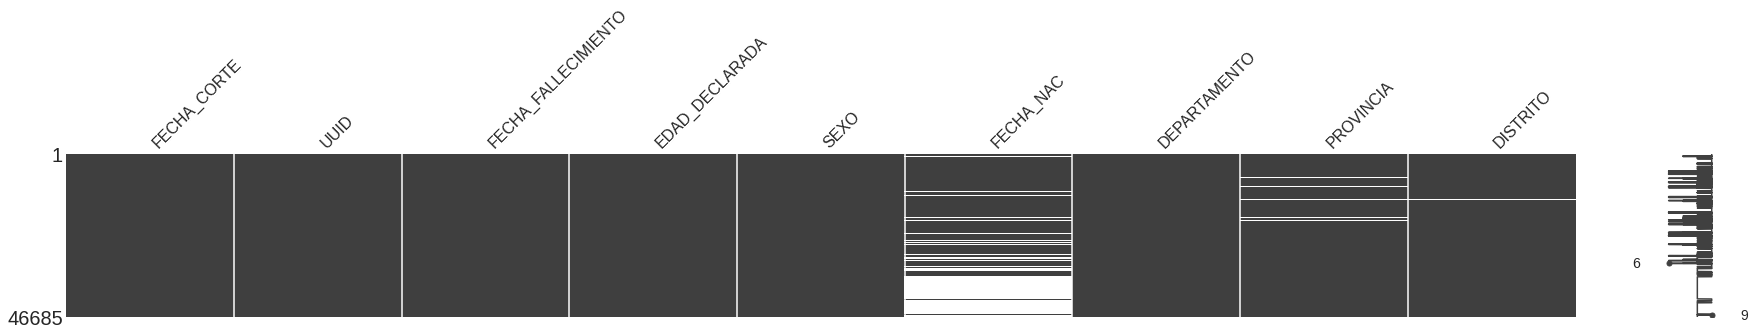

In [8]:
# Analyzing if we have any missing values in our dataset (the white spaces are the missing values)
missingno.matrix(death_cases, figsize=(30, 3))

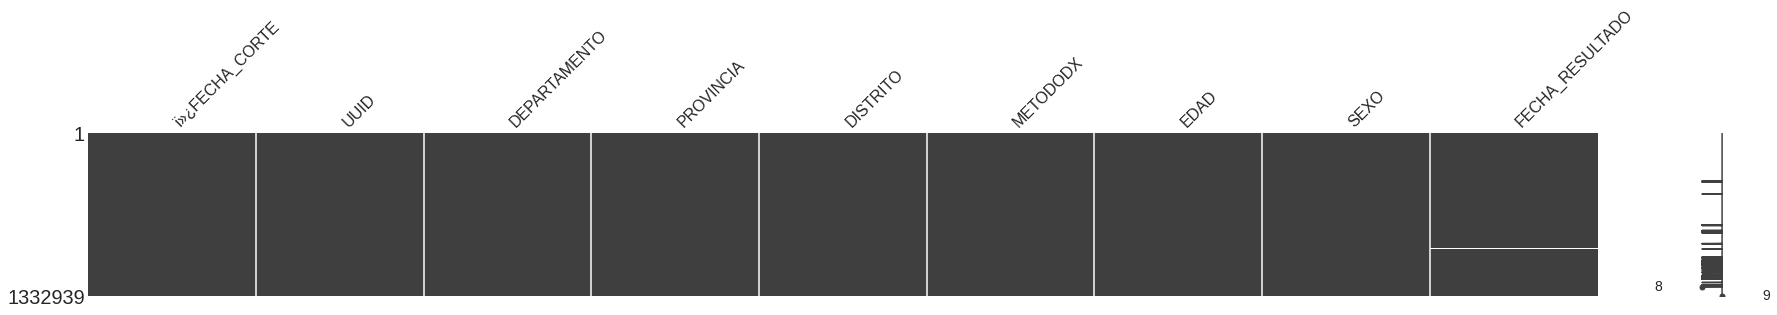

In [9]:
missingno.matrix(positive_cases, figsize=(30, 3))

In [10]:
# All the missing values (or null)
death_cases.isnull().sum()

FECHA_CORTE                0
UUID                       0
FECHA_FALLECIMIENTO        0
EDAD_DECLARADA             0
SEXO                       0
FECHA_NAC              14938
DEPARTAMENTO               0
PROVINCIA                851
DISTRITO                 321
dtype: int64

Text(0.5, 1.0, 'Deaths in Peru by Department')

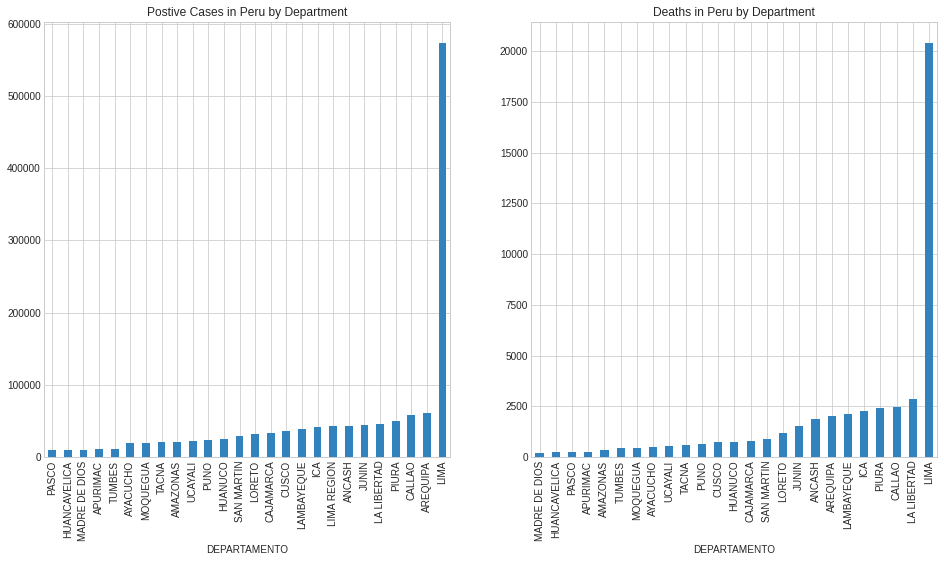

In [12]:
fig = plt.figure(figsize= (16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

positive_cases.groupby('DEPARTAMENTO').DEPARTAMENTO.count().sort_values().plot.bar(cmap="tab20c", ax=ax1)
ax1.set_title("Postive Cases in Peru by Department")

death_cases.groupby('DEPARTAMENTO').DEPARTAMENTO.count().sort_values().plot.bar(cmap="tab20c", ax=ax2)
ax2.set_title("Deaths in Peru by Department")

Text(0.5, 0, '')

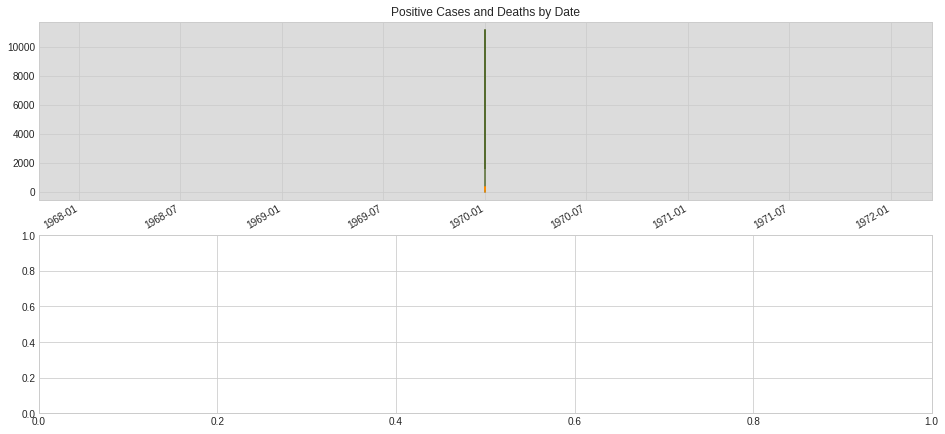

In [20]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

positive_cases.groupby("FECHA_RESULTADO").FECHA_RESULTADO.count().plot(kind="line", x = "FECHA_RESULTADO", ax=ax1, color = "darkolivegreen")
death_cases.groupby("FECHA_FALLECIMIENTO").FECHA_FALLECIMIENTO.count().plot(kind="line", x = "FECHA_FALLECIMIENTO", ax=ax1, color= "darkorange")

ax1.set_title("Positive Cases and Deaths by Date")
ax1.set_facecolor("gainsboro")
ax1.set_xlabel('')